# LAB 2

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.display import clear_output

import logging
import os

import mlflow
import mlflow.sklearn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split

from joblib import dump, load
from fedot.api.main import Fedot
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
import pickle
from tpot import TPOTClassifier

### –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(url, names=column_names)

df

sepal_length  sepal_width  petal_length  petal_width         species
1             5.1          3.5           1.4          0.2     Iris-setosa
2             4.9          3.0           1.4          0.2     Iris-setosa
3             4.7          3.2           1.3          0.2     Iris-setosa
4             4.6          3.1           1.5          0.2     Iris-setosa
5             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
146           6.7          3.0           5.2          2.3  Iris-virginica
147           6.3          2.5           5.0          1.9  Iris-virginica
148           6.5          3.0           5.2          2.0  Iris-virginica
149           6.2          3.4           5.4          2.3  Iris-virginica
150           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

### –ê–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

In [4]:
print(df.describe())
print('_'*60)
print(df.info())
print('_'*60)
print(df['species'].value_counts())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
____________________________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    ob

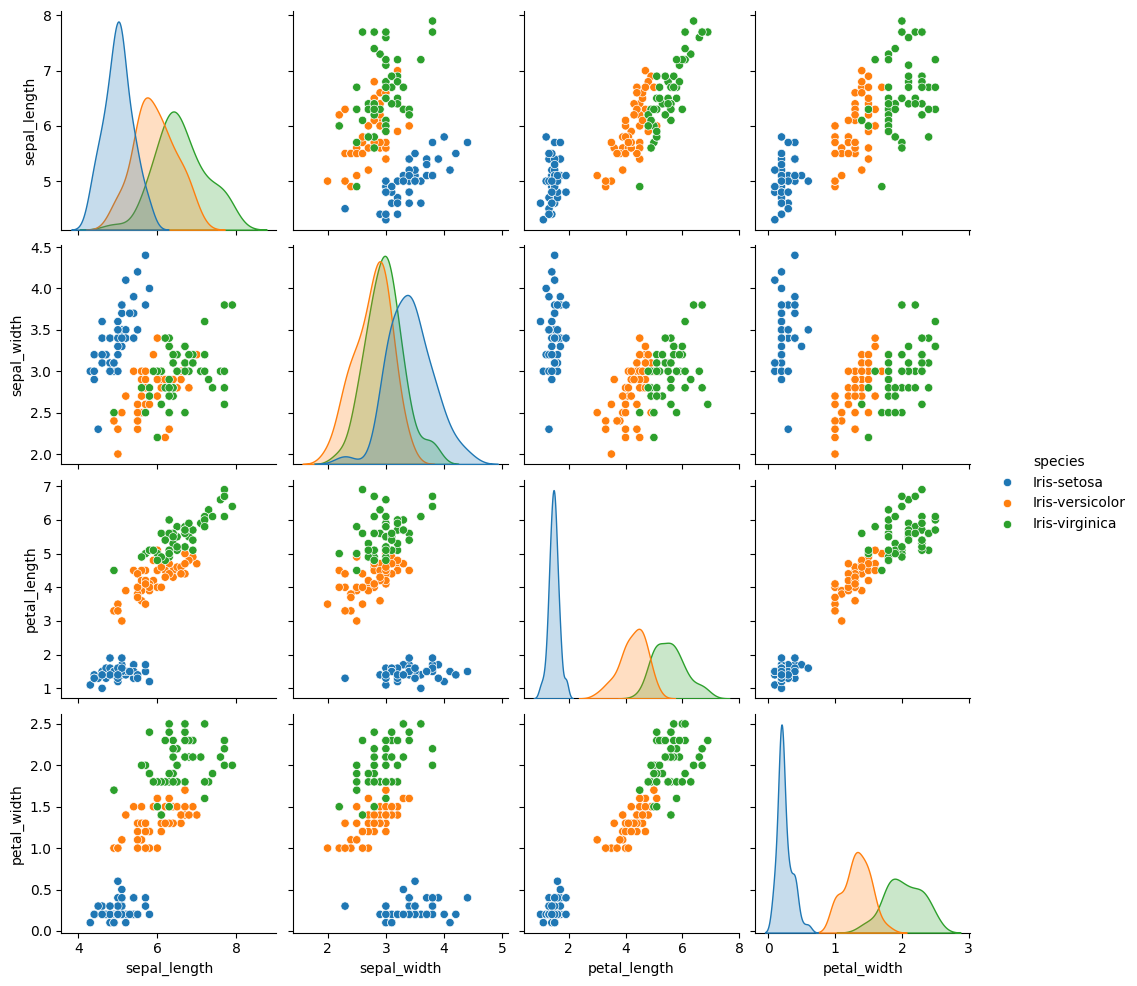

In [5]:
sns.pairplot(df, hue='species')
plt.show()

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –¥–∞—Ç–∞—Å–µ—Ç —Å–æ–¥–µ—Ä–∂–∏—Ç 3 –∫–ª–∞—Å—Å–∞, –∫–æ—Ç–æ—Ä—ã–µ —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω—ã –∏ –¥–æ–≤–æ–ª—å–Ω–æ –ª–µ–≥–∫–æ –≤–∏–∑—É–∞–ª—å–Ω–æ-—Ä–∞–∑–¥–µ–ª–∏–º—ã

### –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ LogisticRegression –¥–ª—è –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –¥–∞—Ç–∞—Å–µ—Ç–∞, –Ω–∞ –ø—Ä–∏–º–µ—Ä–µ –¥–∞–Ω–Ω—ã—Ö (versicolor –∏ virginica)

In [6]:
df_binary = df[df['species'].isin(['Iris-virginica', 'Iris-versicolor'])].copy()
df_binary['species'] = df_binary['species'].map({'Iris-virginica': 0, 'Iris-versicolor': 1})

In [7]:
X = df_binary.drop('species', axis=1)
y = df_binary['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70, 4), (30, 4), (70,), (30,))

In [8]:
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [9]:
accuracy, precision, recall = (
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred),
    recall_score(y_test, y_pred),
)
print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')

Accuracy: 0.9, Precision: 1.0, Recall: 0.8235294117647058


### –ü–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

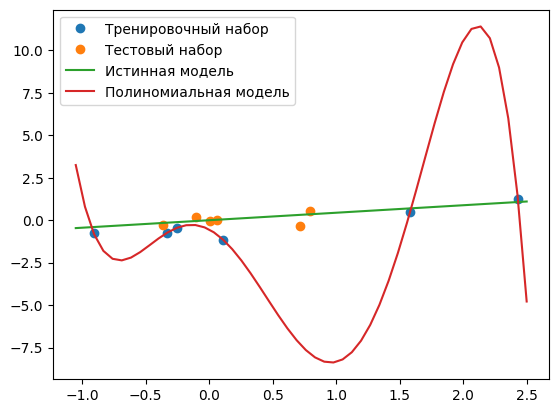

In [10]:
# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ —Å–µ–º–µ–Ω–∏ –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
np.random.seed(5)

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è
n_features = 1  # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (—Ñ–∏—á–µ–π)
n_samples = 6   # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—Ä–∞–∑—Ü–æ–≤ –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º –Ω–∞–±–æ—Ä–µ

# –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–≥–æ –Ω–∞–±–æ—Ä–∞
w_true = np.random.randn(n_features)  # –∏—Å—Ç–∏–Ω–Ω—ã–µ –≤–µ—Å–∞ –º–æ–¥–µ–ª–∏
X_train = np.random.randn(n_samples, n_features)
y_train = X_train @ w_true + np.random.randn(n_samples)

# –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–≥–æ –Ω–∞–±–æ—Ä–∞
X_val = np.random.randn(n_samples, n_features)
y_val = X_val @ w_true + np.random.randn(n_samples)

# –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –Ω–∞–±–æ—Ä–∞
X_test = np.random.randn(n_samples, n_features)
y_test = X_test @ w_true + np.random.randn(n_samples)

# –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö
x_begin = -1.05
x_end = 2.5
n_polynomial_terms = 5  # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —á–ª–µ–Ω–æ–≤ –≤ –ø–æ–ª–∏–Ω–æ–º–µ
X_polynomial = np.hstack([np.ones((n_samples, 1)), X_train ** np.arange(1, n_polynomial_terms + 1)])
w_polynomial = np.linalg.inv(X_polynomial.T @ X_polynomial) @ X_polynomial.T @ y_train
y_polynomial = [
    np.array([x**i for i in range(n_polynomial_terms + 1)]) @ w_polynomial for x in np.linspace(x_begin, x_end)
]

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö
plt.plot(X_train, y_train, 'o', label='–¢—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–π –Ω–∞–±–æ—Ä')
plt.plot(X_test, y_test, 'o', label='–¢–µ—Å—Ç–æ–≤—ã–π –Ω–∞–±–æ—Ä')
plt.plot(np.linspace(x_begin, x_end), w_true * np.linspace(x_begin, x_end), '-', label='–ò—Å—Ç–∏–Ω–Ω–∞—è –º–æ–¥–µ–ª—å')
plt.plot(np.linspace(x_begin, x_end), y_polynomial, '-', label='–ü–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å')

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –ª–µ–≥–µ–Ω–¥—ã –∏ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.legend(loc='best')
plt.show()

**–ß—Ç–æ —Ç–∞–∫–æ–µ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ, –∏ –∫–∞–∫ —Å –Ω–∏–º –±–æ—Ä–æ—Ç—å—Å—è?**
–ü–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ (overfitting) ‚Äî —ç—Ç–æ —è–≤–ª–µ–Ω–∏–µ, –∫–æ–≥–¥–∞ –º–æ–¥–µ–ª—å –æ–±—É—á–∞–µ—Ç—Å—è —Å–ª–∏—à–∫–æ–º —Ö–æ—Ä–æ—à–æ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö –∏ –ø–ª–æ—Ö–æ —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è —Å –Ω–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏. –≠—Ç–æ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –∏–∑-–∑–∞ —Ç–æ–≥–æ, —á—Ç–æ –º–æ–¥–µ–ª—å —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è —Å–ª–∏—à–∫–æ–º —Å–ª–æ–∂–Ω–æ–π –∏ –Ω–∞—á–∏–Ω–∞–µ—Ç —É—á–∏—Ç—å—Å—è –Ω–∞ —à—É–º–∞—Ö –∏–ª–∏ —Å–ª—É—á–∞–π–Ω—ã—Ö –≤–∞—Ä–∏–∞—Ü–∏—è—Ö –≤ –¥–∞–Ω–Ω—ã—Ö.

–°—É—â–µ—Å—Ç–≤–µ—Ç –º–Ω–æ–∂–µ—Å—Ç–≤–æ –º–µ—Ç–æ–¥–æ–≤ –±–æ—Ä—å–±—ã —Å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ–º, –≤–æ—Ç –Ω–µ–∫–æ—Ç–æ—ã–µ –∏–∑ –Ω–∏—Ö:

> 1. –£–ø—Ä–æ—â–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: –°–æ–∫—Ä–∞—â–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–¥–µ–ª–∏ –∏–ª–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –±–æ–ª–µ–µ –ø—Ä–æ—Å—Ç–æ–π —Å—Ç—Ä—É–∫—Ç—É—Ä—ã. –ù–∞–ø—Ä–∏–º–µ—Ä, –≤–º–µ—Å—Ç–æ –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ª–∏–Ω–µ–π–Ω—É—é.

> 2. –†–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è: –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–µ–±–æ–ª—å—à–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –∫ –≤–µ—Å–∞–º –º–æ–¥–µ–ª–∏ –¥–ª—è –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—â–µ–Ω–∏—è —á—Ä–µ–∑–º–µ—Ä–Ω–æ–≥–æ —É–≤–µ–ª–∏—á–µ–Ω–∏—è –∏—Ö –≤–µ–ª–∏—á–∏–Ω—ã. –≠—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–¥–µ–ª–∞–Ω–æ —Å –ø–æ–º–æ—â—å—é L1-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ (Lasso) –∏–ª–∏ L2-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ (Ridge).

> 3. –ü–æ–Ω–∏–∂–µ–Ω–∏–µ —Å—Ç–µ–ø–µ–Ω–∏ —Å–≤–æ–±–æ–¥—ã: –£–º–µ–Ω—å—à–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å—Ç–µ–ø–µ–Ω–µ–π —Å–≤–æ–±–æ–¥—ã –º–æ–¥–µ–ª–∏, —á—Ç–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–æ–≤ —Å–Ω–∏–∂–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏, —Ç–∞–∫–∏—Ö –∫–∞–∫ PCA (Principal Component Analysis) –∏–ª–∏ t-SNE.

> 4. –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è: –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–π –∏ —Ç–µ—Å—Ç–æ–≤—ã–π –Ω–∞–±–æ—Ä—ã –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏.

> 5. Early Stopping: –û—Å—Ç–∞–Ω–æ–≤–∫–∞ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ –ø—Ä–∏ –¥–æ—Å—Ç–∏–∂–µ–Ω–∏–∏ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–≥–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è –∫–∞—á–µ—Å—Ç–≤–∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ.

> 6. –î—Ä–æ–ø–∞—É—Ç: –£–¥–∞–ª–µ–Ω–∏–µ —Å–ª—É—á–∞–π–Ω—ã—Ö –Ω–µ–π—Ä–æ–Ω–æ–≤ –∏–ª–∏ —Å–ª–æ–µ–≤ –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è, —á—Ç–æ–±—ã –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—Ç–∏—Ç—å —á—Ä–µ–∑–º–µ—Ä–Ω–æ–µ —É–≤–µ–ª–∏—á–µ–Ω–∏–µ —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏.

> 7. –ë–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è: –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –≤—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –±–∞—Ç—á–∞ (–º–∏–Ω–∏-–±–ª–æ–∫–∞) –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è, —á—Ç–æ –ø–æ–º–æ–≥–∞–µ—Ç —É–º–µ–Ω—å—à–∏—Ç—å –≤–ª–∏—è–Ω–∏–µ —à—É–º–∞ –≤ –¥–∞–Ω–Ω—ã—Ö.

> 8. –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –±–æ–ª–µ–µ –ø—Ä–æ—Å—Ç—ã—Ö —Ñ—É–Ω–∫—Ü–∏–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏: –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –∏–º–µ—é—Ç —á—Ä–µ–∑–º–µ—Ä–Ω–æ–≥–æ —É–≤–µ–ª–∏—á–µ–Ω–∏—è —Å–ª–æ–∂–Ω–æ—Å—Ç–∏, —Ç–∞–∫–∏–µ –∫–∞–∫ ReLU –∏–ª–∏ Sigmoid.

### –û–±–æ–≥–∞—â–µ–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞

–ù–∞–º —É–∂–µ –±—ã–ª –∏–∑–≤–µ—Å—Ç–µ–Ω —Å–ø–æ—Å–æ–± –æ–±–æ–≥–∞—â–µ–Ω–∏—è `SMOTE`, –∫–æ—Ç–æ—Ä—ã–π –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è —É—Å—Ç—Ä–∞–Ω–µ–Ω–∏—è –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞ –∫–ª–∞—Å—Å–æ–≤. –ù–∏–∂–µ –Ω–∞–º–∏ –±—ã–ª —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω –º–µ—Ç–æ–¥, —Å–æ —Å—Ö–æ–∂–∏–º –º–µ—Ö–∞–Ω–∏–∑–º–æ–º –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –Ω–æ–≤—ã—Ö —ç–∫–∑–µ–º–ø–ª—è—Ä–æ–≤ —á–µ—Ä–µ–∑ –≤—ã–ø—É–∫–ª—ã–µ –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏ –ø–∞—Ä —Ç–æ—á–µ–∫, –Ω–æ —Ä–∞—Å—à–∏—Ä—è—é—â–∏–π –≤—Å–µ –∫–ª–∞—Å—Å—ã, –∞ –Ω–µ —Ç–æ–ª—å–∫–æ –º–µ–Ω—å—à–∏–π –∏–∑ –Ω–∏—Ö.

**–°—É—Ç—å –º–µ—Ç–æ–¥–∞**
–ú–µ—Ç–æ–¥ —Å–æ–∑–¥–∞—ë—Ç **–Ω–æ–≤—ã–µ —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–µ —ç–∫–∑–µ–º–ø–ª—è—Ä—ã** –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ Iris, –∫–æ–º–±–∏–Ω–∏—Ä—É—è –ø–∞—Ä—ã —Ä–µ–∞–ª—å–Ω—ã—Ö —Ç–æ—á–µ–∫ **–≤—ã–ø—É–∫–ª–æ–π –ª–∏–Ω–µ–π–Ω–æ–π –∫–æ–º–±–∏–Ω–∞—Ü–∏–µ–π**.

**–ö–∞–∫ —ç—Ç–æ —Ä–∞–±–æ—Ç–∞–µ—Ç?**  
1. **–í—ã–±–æ—Ä –¥–≤—É—Ö —Å–ª—É—á–∞–π–Ω—ã—Ö —Ç–æ—á–µ–∫ –∏–∑ –æ–¥–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞**  
   - –î–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞ (–Ω–∞–ø—Ä–∏–º–µ—Ä, `Iris-setosa`) –±–µ—Ä—É—Ç—Å—è –¥–≤–µ —Å–ª—É—á–∞–π–Ω—ã–µ —Ç–æ—á–∫–∏ \( A \) –∏ \( B \).  
   - –ò—Ö –ø—Ä–∏–∑–Ω–∞–∫–∏ (–¥–ª–∏–Ω–∞/—à–∏—Ä–∏–Ω–∞ —á–∞—à–µ–ª–∏—Å—Ç–∏–∫–æ–≤ –∏ –ª–µ–ø–µ—Å—Ç–∫–æ–≤) —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—é—Ç—Å—è –∫–∞–∫ –≤–µ–∫—Ç–æ—Ä—ã –≤ 4-–º–µ—Ä–Ω–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ.  
2. **–í—ã—á–∏—Å–ª–µ–Ω–∏–µ –≤—ã–ø—É–∫–ª–æ–π –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏**  
   - –ì–µ–Ω–µ—Ä–∏—Ä—É–µ—Ç—Å—è —Å–ª—É—á–∞–π–Ω—ã–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç \(alpha in [0, 1] \).  
   - –ù–æ–≤–∞—è —Ç–æ—á–∫–∞ \( C \) –≤—ã—á–∏—Å–ª—è–µ—Ç—Å—è –∫–∞–∫:  
     \[
     C = alpha * A + (1 - alpha) * B
     \]  
   - –≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ \( C \) –ª–µ–∂–∏—Ç **–Ω–∞ –æ—Ç—Ä–µ–∑–∫–µ –º–µ–∂–¥—É \( A \) –∏ \( B \)** –≤ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.  
3. **–°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –∫–ª–∞—Å—Å–∞**  
   - –ù–æ–≤–∞—è —Ç–æ—á–∫–∞ \( C \) –Ω–∞—Å–ª–µ–¥—É–µ—Ç –º–µ—Ç–∫—É –∫–ª–∞—Å—Å–∞ –æ—Ç \( A \) –∏ \( B \), —Ç–∞–∫ –∫–∞–∫ –æ–Ω–∏ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–∞—Ç –æ–¥–Ω–æ–º—É –∫–ª–∞—Å—Å—É. 

**–ì–µ–æ–º–µ—Ç—Ä–∏—á–µ—Å–∫–∞—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è**  
- –í **–ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤** (–Ω–∞–ø—Ä–∏–º–µ—Ä, –≤ 2D-–ø—Ä–æ–µ–∫—Ü–∏–∏ `sepal_length` vs `petal_length`):  
  - –ò—Å—Ö–æ–¥–Ω—ã–µ —Ç–æ—á–∫–∏ –æ–±—Ä–∞–∑—É—é—Ç **–æ–±–ª–∞–∫–æ (–∫–ª–∞—Å—Ç–µ—Ä)**.  
  - –ù–æ–≤—ã–µ —Ç–æ—á–∫–∏ –∑–∞–ø–æ–ª–Ω—è—é—Ç **–≤—ã–ø—É–∫–ª—É—é –æ–±–æ–ª–æ—á–∫—É** —ç—Ç–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞, **–Ω–µ –≤—ã—Ö–æ–¥—è –∑–∞ –µ–≥–æ –≥—Ä–∞–Ω–∏—Ü—ã**.  

- –ï—Å–ª–∏ –∏—Å—Ö–æ–¥–Ω—ã–µ —Ç–æ—á–∫–∏ –ª–µ–∂–∞—Ç –≤ –Ω–µ–∫–æ—Ç–æ—Ä–æ–º –º–Ω–æ–≥–æ–æ–±—Ä–∞–∑–∏–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –Ω–∞ –≥–∏–ø–µ—Ä–ø–ª–æ—Å–∫–æ—Å—Ç–∏), –Ω–æ–≤—ã–µ —Ç–æ—á–∫–∏ —Ç–∞–∫–∂–µ –æ—Å—Ç–∞–Ω—É—Ç—Å—è –≤ –Ω—ë–º.

In [11]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –≤—ã–ø—É–∫–ª—ã—Ö –∫–æ–º–±–∏–Ω–∞—Ü–∏–π

def generate_convex_combinations(group, num_combinations=1):
    new_samples = []
    n = len(group)
    if n < 2:
        return pd.DataFrame()
    
    features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    for _ in range(num_combinations):
        idx1, idx2 = np.random.choice(n, 2, replace=False)
        sample1 = group.iloc[idx1]
        sample2 = group.iloc[idx2]
        
        alpha = np.random.uniform(0, 1)
        
        new_features = alpha * sample1[features] + (1 - alpha) * sample2[features]
        
        new_sample = new_features.to_dict()
        new_sample['species'] = sample1['species']
        new_samples.append(new_sample)
    
    return pd.DataFrame(new_samples)

In [12]:
augmented_dfs = []
for species in df['species'].unique():
    species_group = df[df['species'] == species]
    augmented_samples = generate_convex_combinations(species_group, num_combinations=len(species_group)//2)  # –£–¥–≤–∞–∏–≤–∞–µ–º —Ä–∞–∑–º–µ—Ä –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞
    augmented_dfs.append(species_group)
    augmented_dfs.append(augmented_samples)

augmented_df = pd.concat(augmented_dfs, ignore_index=True)

print(f"Original size: {len(df)}")
print(f"Augmented size: {len(augmented_df)}")
print(augmented_df['species'].value_counts())

Original size: 150
Augmented size: 225
Iris-setosa        75
Iris-versicolor    75
Iris-virginica     75
Name: species, dtype: int64


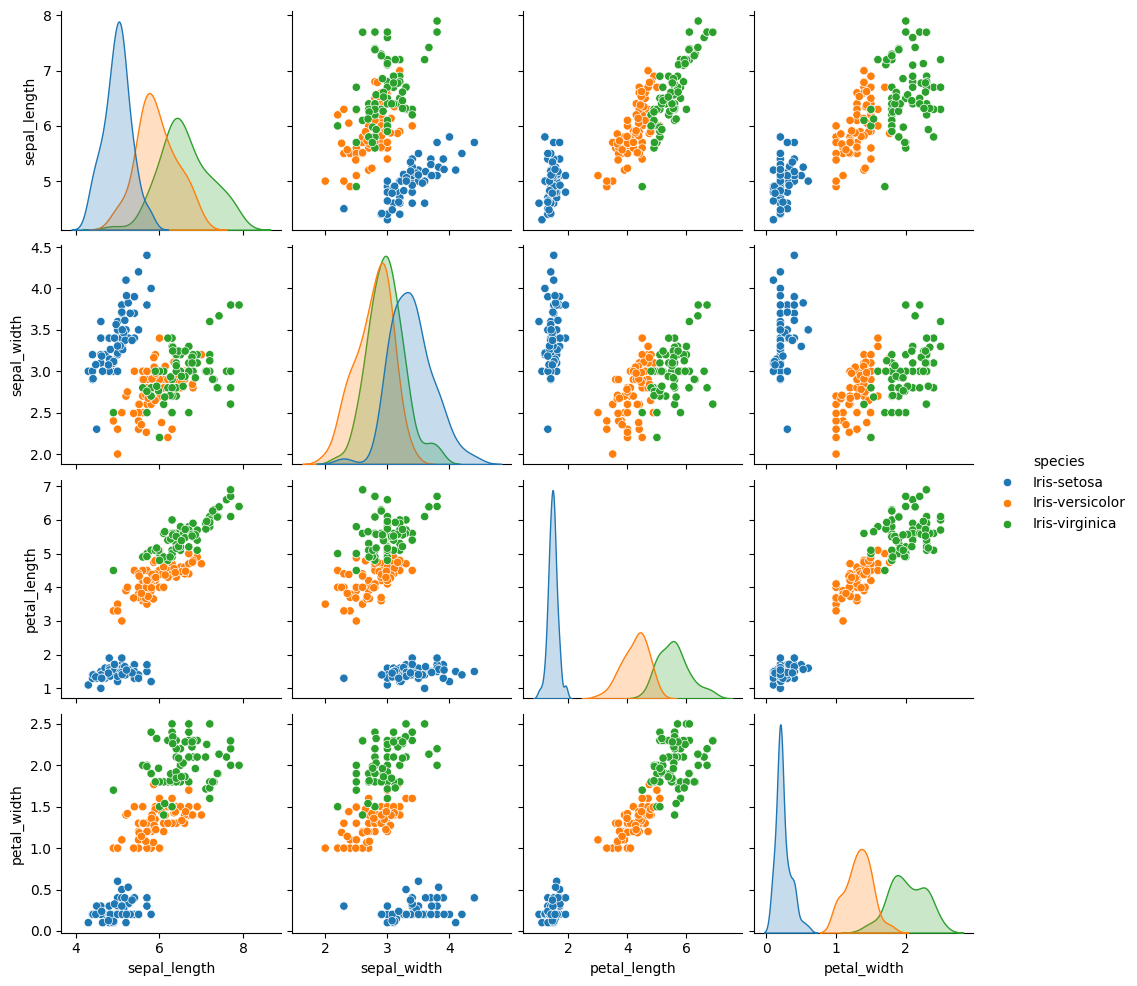

In [13]:
sns.pairplot(augmented_df, hue='species')
plt.show()

–ö–∞–∫ –≤–∏–¥–Ω–æ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–∞—Ö, —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–µ –ø–æ–º–µ–Ω—è–ª–∏—Å—å, –∏–∑–º–µ–Ω–∏–ª–æ—Å—å –ª–∏—à—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–∫–∑–µ–º–ø–ª—è—Ä–æ–≤ –∫–∞–∂–¥–æ–≥–æ –∏–∑ 3 –∫–ª–∞—Å—Å–æ–≤

# LAB3 AutoML

In [14]:
directory = 'autoML_models'
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f'directory "{directory}" was created')
else:
    print(f'directory "{directory}" already exists')

directory "autoML_models" was created


### Lama

In [15]:
X = augmented_df.drop('species', axis=1)

mapper = {
    'Iris-virginica': 0,
    'Iris-versicolor': 1,
    'Iris-setosa': 2
}
y = augmented_df['species'].replace(mapper)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

task = Task('multiclass')

automl = TabularAutoML(
    task=task,
    cpu_limit=-1,
    general_params={'use_algos': 'auto'},
    reader_params={'cv': 3, 'random_state': 42}
)

train_data = pd.concat([X_train, y_train], axis=1)
roles = {
    'target': 'species',
    'drop': []
}

oof_pred = automl.fit_predict(
    train_data=train_data,
    roles=roles,
    verbose=1
)

test_pred = automl.predict(X_test)
y_pred = test_pred.data.argmax(axis=1)

accuracy, precision, recall = (
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
)

clear_output(wait=False)
print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')

Accuracy: 1.0, Precision: 1.0, Recall: 1.0


In [16]:
with open(f'{directory}/lightautoml_iris_model.pkl', 'wb') as f:
    pickle.dump(automl, f)

with open(f'{directory}/lightautoml_iris_model.pkl', 'rb') as f:
    loaded_automl = pickle.load(f)

new_pred = loaded_automl.predict(X_test).data.argmax(axis=1)
accuracy, precision, recall = (
    accuracy_score(y_test, new_pred),
    precision_score(y_test, new_pred, average='weighted'),
    recall_score(y_test, new_pred, average='weighted'),
)
print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')

Accuracy: 1.0, Precision: 1.0, Recall: 1.0


In [17]:
try:
    algo = loaded_automl.levels[0][0].ml_algos[0]
    print(f"–¢–∏–ø –∞–ª–≥–æ—Ä–∏—Ç–º–∞: {type(algo).__name__}")
    
    if hasattr(algo, 'models'):
        model = algo.models[0]
        print(f"–¢–∏–ø –º–æ–¥–µ–ª–∏: {type(model).__name__}")
        attrs_to_show = [attr for attr in dir(model) if not attr.startswith('_')]

        print(f"\n=== –ü–∞—Ä–∞–º–µ—Ç—Ä—ã {type(model).__name__} ===")
        for attr in attrs_to_show:
            try:
                value = getattr(model, attr)
                
                if attr == 'model':
                    print("\n–ê—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ –Ω–µ–π—Ä–æ—Å–µ—Ç–∏:")
                    print(value)
                elif attr == 'loss':
                    print(f"\n–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å: {value.__class__.__name__}")
                else:
                    print(f"{attr}: {value}")
                    
            except Exception as e:
                print(f"{attr}: [–Ω–µ –¥–æ—Å—Ç—É–ø–µ–Ω]")

except Exception as e:
    print(f"–û—à–∏–±–∫–∞: {str(e)}")
    print("–ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—ã–π –º–µ—Ç–æ–¥:")
    print(loaded_automl.print_model_info())

–¢–∏–ø –∞–ª–≥–æ—Ä–∏—Ç–º–∞: LinearLBFGS
–¢–∏–ø –º–æ–¥–µ–ª–∏: TorchBasedLogisticRegression

=== –ü–∞—Ä–∞–º–µ—Ç—Ä—ã TorchBasedLogisticRegression ===
categorical_idx: []
cs: [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]
data_size: 4
early_stopping: 2
embed_sizes: ()
fit: <bound method TorchBasedLinearEstimator.fit of <lightautoml.ml_algo.torch_based.linear_model.TorchBasedLogisticRegression object at 0x000001FC4C3C3CD0>>

–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å: TorchLossWrapper
max_iter: 100
metric: <lightautoml.tasks.losses.base.MetricFunc object at 0x000001FC4A542160>

–ê—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ –Ω–µ–π—Ä–æ—Å–µ—Ç–∏:
CatMulticlass(
  (linear): Linear(in_features=4, out_features=3, bias=False)
  (final_act): SoftmaxClip(
    (smax): Softmax(dim=1)
  )
)
output_size: 3
predict: <bound method TorchBasedLogisticRegression.predict of <lightautoml.ml_algo.torch_based.linear_model.TorchBasedLogisticRegression object at 0x000001FC4C3C

### Fedot

In [18]:
X = augmented_df.drop('species', axis=1)
y = augmented_df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è Fedot —Å —è–≤–Ω—ã–º —É–∫–∞–∑–∞–Ω–∏–µ–º –¥–æ—Å—Ç—É–ø–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π
automl_model = Fedot(
    problem='classification',
    preset='fast_train',
    # timeout=10,  # 2 –º–∏–Ω—É—Ç—ã –Ω–∞ –ø–æ–¥–±–æ—Ä
    available_operations=['rf', 'logit','mlp', 'xgboost'],
    logging_level=logging.CRITICAL,
    with_tuning=True,
    n_jobs=-1,
    seed=42
)

try:
    pipeline = automl_model.fit(features=X_train, target=y_train)
    
    y_pred = automl_model.predict(features=X_test)
    
    accuracy, precision, recall = (
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='weighted'),
        recall_score(y_test, y_pred, average='weighted'),
    )
    print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')

    
except Exception as e:
    print(f'–ü—Ä–æ–∏–∑–æ—à–ª–∞ –æ—à–∏–±–∫–∞: {str(e)}')
    print('–ü–æ–ø—Ä–æ–±—É–π—Ç–µ –æ–±–Ω–æ–≤–∏—Ç—å Fedot –∏–ª–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥—Ä—É–≥–æ–π –ø—Ä–µ—Å–µ—Ç')

2025-03-31 19:56:24,811 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'


Generations:   0%|          | 49/10000 [02:29<8:27:11,  3.06s/gen] 


Accuracy: 1.0, Precision: 1.0, Recall: 1.0


In [20]:
def get_pipeline_info(pipeline):
    """–†–µ–∫—É—Ä—Å–∏–≤–Ω–æ –ø–æ–ª—É—á–∞–µ—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –ø–∞–π–ø–ª–∞–π–Ω–µ"""
    info = []
    
    def process_node(node, level=0):
        indent = "  " * level
        node_info = {
            'type': str(node.operation.operation_type),
            'params': getattr(node, 'parameters', {}),
            'level': level,
            'node_object': node  # –°–æ—Ö—Ä–∞–Ω—è–µ–º —Å–∞–º –æ–±—ä–µ–∫—Ç —É–∑–ª–∞
        }
        info.append(node_info)
        
        if hasattr(node, 'nodes_from'):
            for parent in node.nodes_from:
                process_node(parent, level + 1)
    
    process_node(pipeline.root_node if hasattr(pipeline, 'root_node') else pipeline)
    return info

best_pipeline = automl_model.current_pipeline
pipeline_info = get_pipeline_info(best_pipeline)

for item in pipeline_info:
    print(f"{'  ' * item['level']}–£–∑–µ–ª: {item['type']}")
    print(f"{'  ' * item['level']}–ü–∞—Ä–∞–º–µ—Ç—Ä—ã: {item['params']}")
    
    node = item['node_object']
    try:
        if hasattr(node, 'fitted_operation'):
            fitted_params = node.fitted_operation.get_params()
            print('Fitted_params: {')
            for param in fitted_params:
                print(f'\t{param}: {fitted_params[param]}')
            print('}')
    except Exception as e:
        print(f'–ù–µ —É–¥–∞–ª–æ—Å—å –ø–æ–ª—É—á–∏—Ç—å fitted –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {str(e)}')

–£–∑–µ–ª: mlp
–ü–∞—Ä–∞–º–µ—Ç—Ä—ã: {}
Fitted_params: {
	activation: relu
	alpha: 0.0001
	batch_size: auto
	beta_1: 0.9
	beta_2: 0.999
	early_stopping: False
	epsilon: 1e-08
	hidden_layer_sizes: (100,)
	learning_rate: constant
	learning_rate_init: 0.001
	max_fun: 15000
	max_iter: 200
	momentum: 0.9
	n_iter_no_change: 10
	nesterovs_momentum: True
	power_t: 0.5
	random_state: None
	shuffle: True
	solver: adam
	tol: 0.0001
	validation_fraction: 0.1
	verbose: False
	warm_start: False
}


In [21]:
with open(f'{directory}/fedot_model.pkl', 'wb') as f:
    pickle.dump(automl_model, f)

with open(f'{directory}/fedot_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

y_pred = loaded_model.predict(features=X_test)

accuracy, precision, recall = (
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
)
print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')

Accuracy: 1.0, Precision: 1.0, Recall: 1.0


### TPOT

In [22]:
tpot = TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)
tpot.fit(X_train, y_train)

Version 0.12.1 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


                                                                             
Generation 1 - Current best internal CV score: 0.9888888888888889
                                                                             
Generation 2 - Current best internal CV score: 0.9888888888888889
                                                                             
Generation 3 - Current best internal CV score: 0.9888888888888889
                                                                              
Generation 4 - Current best internal CV score: 0.9888888888888889
                                                                              
Generation 5 - Current best internal CV score: 0.9888888888888889
                                                                              
Best pipeline: MLPClassifier(input_matrix, alpha=0.001, learning_rate_init=0.01)


TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)

In [23]:
y_pred = tpot.predict(X_test)
accuracy, precision, recall = (
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')

Accuracy: 1.0, Precision: 1.0, Recall: 1.0


In [24]:
final_pipeline = tpot.fitted_pipeline_

dump(final_pipeline, f'{directory}/final_pipeline.joblib')
loaded_pipeline = load(f'{directory}/final_pipeline.joblib')

y_pred = loaded_pipeline.predict(X_test)
accuracy, precision, recall = (
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')

Accuracy: 1.0, Precision: 1.0, Recall: 1.0


In [25]:
loaded_pipeline = load(f'{directory}/final_pipeline.joblib')

for step_name, step_estimator in loaded_pipeline.steps:
    print(f"–¢–∏–ø: {type(step_estimator).__name__}")
    params = step_estimator.get_params()
    print("–ü–∞—Ä–∞–º–µ—Ç—Ä—ã:")
    for el in params:
        print(f'\t{el}: {params[el]}')

–¢–∏–ø: MLPClassifier
–ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
	activation: relu
	alpha: 0.001
	batch_size: auto
	beta_1: 0.9
	beta_2: 0.999
	early_stopping: False
	epsilon: 1e-08
	hidden_layer_sizes: (100,)
	learning_rate: constant
	learning_rate_init: 0.01
	max_fun: 15000
	max_iter: 200
	momentum: 0.9
	n_iter_no_change: 10
	nesterovs_momentum: True
	power_t: 0.5
	random_state: 42
	shuffle: True
	solver: adam
	tol: 0.0001
	validation_fraction: 0.1
	verbose: False
	warm_start: False


# Lab4 MLFlow

–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –ø—Ä–∏–º–µ—Ä–æ–≤ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ —Ä–µ—à–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –∑–∞–¥–∞—á–∏ –ø–æ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—é –∏ –æ—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–µ–π –±—ã–ª–∞ –ø—Ä–æ–≤–µ–¥–µ–Ω–∞ –≤—ã—à–µ.
–ú–µ—Ç—Ä–∏–∫–∏ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ä–∞–Ω–µ–µ –º–æ–¥–µ–ª–µ–π –∏–º–µ—é—Ç –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–Ω–∏–µ, —Ç–∞–∫ –∫–∞–∫ –∑–∞–¥–∞—á–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ Iris –∫—Ä–∞–π–Ω–µ –ø—Ä–æ—Å—Ç–∞. –í —Å–≤—è–∑–∏ —Å —ç—Ç–∏–º.

–ü–µ—Ä–µ–π–¥—ë–º –∫ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏

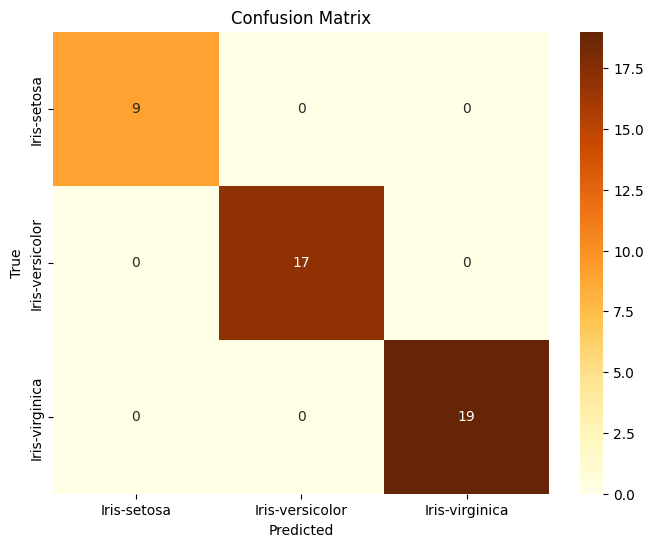

In [26]:
# –ü–æ—Å–ª–µ –ø–æ–ª—É—á–µ–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (y_test –∏ y_pred –∏–∑ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –∫–æ–¥–∞)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', 
            xticklabels=df['species'].unique(),
            yticklabels=df['species'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

–ö–∞–∫ –≤–∏–¥–Ω–æ, –º–æ–¥–µ–ª—å –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –¥–µ–ª–∞–µ—Ç –∏–¥–µ–∞–ª—å–Ω–æ —Ç–æ—á–Ω—ã–µ –ø—Ä–æ–≥–Ω–æ–∑—ã

### –†–∞–∑–≤–µ—Ä—Ç—ã–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ –≤ MLFlow

1. –í–≤–æ–¥–∏–º –≤ –∫–æ–º–∞–Ω–¥–Ω—É—é —Å—Ç—Ä–æ–∫—É: `mlflow server --host 127.0.0.1 --port 8080`
2. –ü–µ—Ä–µ—Ö–æ–¥–∏–º –ø–æ –∞–¥—Ä–µ—Å—É: `http://127.0.0.1:8080`

–ü—Ä–æ–¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ–º —Ä–∞–±–æ—Ç—É —Å MLFlow –Ω–∞ –ø—Ä–∏–º–µ—Ä–µ TPOT

In [27]:
mlflow.set_tracking_uri("http://127.0.0.1:8080")

mlflow.set_experiment("Iris_Classification_TPOT")

with mlflow.start_run():
    params = {
        'generations': 5,
        'population_size': 20,
        'random_state': 42,
        'verbosity': 2
    }
    
    mlflow.log_params(params)
    
    tpot = TPOTClassifier(**params)
    tpot.fit(X_train, y_train)
    
    with open(f'{directory}/tpot_model.pkl', 'wb') as f:
        pickle.dump(tpot.fitted_pipeline_, f)
    
    mlflow.log_artifact(f'{directory}/tpot_model.pkl')
    
    mlflow.sklearn.log_model(tpot.fitted_pipeline_, "sklearn_model")
    
    y_pred = tpot.predict(X_test)
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted')
    }
    mlflow.log_metrics(metrics)
    
    print(f"–ú–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ tpot_model.pkl")

2025/03/31 20:39:15 INFO mlflow.tracking.fluent: Experiment with name 'Iris_Classification_TPOT' does not exist. Creating a new experiment.
Version 0.12.1 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


                                                                             
Generation 1 - Current best internal CV score: 0.9888888888888889
                                                                             
Generation 2 - Current best internal CV score: 0.9888888888888889
                                                                             
Generation 3 - Current best internal CV score: 0.9888888888888889
                                                                              
Generation 4 - Current best internal CV score: 0.9888888888888889
                                                                              
Generation 5 - Current best internal CV score: 0.9888888888888889
                                                                              
Best pipeline: MLPClassifier(input_matrix, alpha=0.001, learning_rate_init=0.01)


2025/03/31 20:39:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/03/31 20:39:57 INFO mlflow.tracking._tracking_service.client: üèÉ View run resilient-wasp-502 at: http://127.0.0.1:8080/#/experiments/554819157492597828/runs/697bbf00e2984843b991928f83cd81a3.
2025/03/31 20:39:57 INFO mlflow.tracking._tracking_service.client: üß™ View experiment at: http://127.0.0.1:8080/#/experiments/554819157492597828.


–ú–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ tpot_model.pkl


In [28]:
metrics

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0}